# Dataset Description

# Loading the dataset

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import validation_curve
from sklearn.metrics import accuracy_score
%matplotlib inline

# Finding #1: All Star Analysis with Classification Algorithms

In [6]:
# Using classification algorithms , we will predict if a player is an all star or not based on historical stats
# set the new column as the target variable and use various stats as the X variables 

#Import the complete MLB batting stats dataset
batting = pd.read_csv('Batting.csv', index_col=0)
batting

#Merge the batting dataset with the player name dataset to get the names of the players
playernames = pd.read_csv('Master.csv', index_col=0)
playernames = playernames.drop(['birthYear', 'birthMonth', 'birthDay', 'birthCountry', 'birthState',
       'birthCity', 'deathYear', 'deathMonth', 'deathDay', 'deathCountry',
       'deathState', 'deathCity', 'nameGiven',
       'weight', 'height', 'bats', 'throws', 'debut', 'finalGame', 'retroID',
       'bbrefID'], axis=1)
playernames.head()

FileNotFoundError: [Errno 2] No such file or directory: 'Batting.csv'

In [6]:
battingcomplete = pd.merge(batting, playernames, on=['playerID'], how='left')
battingcomplete

,yearID,stint,teamID,lgID,G,AB,R,H,2B,3B,...,CS,BB,SO,IBB,HBP,SH,SF,GIDP,nameFirst,nameLast
playerID,,,,,,,,,,,,,,,,,,,,,
abercda01,1871,1,TRO,NaN,1,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,Frank,Abercrombie
addybo01,1871,1,RC1,NaN,25,118.0,30.0,32.0,6.0,0.0,...,1.0,4.0,0.0,NaN,NaN,NaN,NaN,NaN,Bob,Addy
allisar01,1871,1,CL1,NaN,29,137.0,28.0,40.0,4.0,5.0,...,1.0,2.0,5.0,NaN,NaN,NaN,NaN,NaN,Art,Allison
allisdo01,1871,1,WS3,NaN,27,133.0,28.0,44.0,10.0,2.0,...,1.0,0.0,2.0,NaN,NaN,NaN,NaN,NaN,Doug,Allison
ansonca01,1871,1,RC1,NaN,25,120.0,29.0,39.0,11.0,3.0,...,2.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,Cap,Anson
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zitoba01,2015,1,OAK,AL,3,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Barry,Zito
zobribe01,2015,1,OAK,AL,67,235.0,39.0,63.0,20.0,2.0,...,1.0,33.0,26.0,2.0,0.0,0.0,3.0,5.0,Ben,Zobrist
zobribe01,2015,2,KCA,AL,59,232.0,37.0,66.0,16.0,1.0,...,3.0,29.0,30.0,1.0,1.0,0.0,2.0,3.0,Ben,Zobrist


In [1]:
battingcomplete.dtypes

NameError: name 'battingcomplete' is not defined

In [5]:
# DATA CLEANING

# drop players who fall below the average AB's per season to avoid skewing
battingcomplete = battingcomplete[battingcomplete['AB'] > 100]
battingcomplete.reset_index()
battingcomplete.to_csv('battingcomplete.csv')
battingcomplete

#create a calculated column for batting average 
battingcomplete['AVG'] = battingcomplete['H']/battingcomplete['AB']
battingcomplete

#filter out years after 1932 since the first All Star Game wasn't until 1933
allstarbatting = battingcomplete[battingcomplete['yearID'] > 1932]
allstarbatting.head()

,yearID,stint,teamID,lgID,G,AB,R,H,2B,3B,...,BB,SO,IBB,HBP,SH,SF,GIDP,nameFirst,nameLast,AVG
playerID,,,,,,,,,,,,,,,,,,,,,
adamssp01,1933,2,CIN,NL,137,538.0,59.0,141.0,21.0,1.0,...,44.0,30.0,NaN,2.0,15.0,NaN,10.0,Sparky,Adams,0.262082
alexada01,1933,1,BOS,AL,94,313.0,40.0,88.0,14.0,1.0,...,25.0,22.0,NaN,1.0,0.0,NaN,NaN,Dale,Alexander,0.281150
allenet01,1933,1,SLN,NL,91,261.0,25.0,63.0,7.0,3.0,...,13.0,22.0,NaN,1.0,6.0,NaN,4.0,Ethan,Allen,0.241379
applilu01,1933,1,CHA,AL,151,612.0,90.0,197.0,36.0,10.0,...,56.0,29.0,NaN,0.0,2.0,NaN,NaN,Luke,Appling,0.321895
averiea01,1933,1,CLE,AL,151,599.0,83.0,180.0,39.0,16.0,...,54.0,29.0,NaN,5.0,0.0,NaN,NaN,Earl,Averill,0.300501


In [19]:
#Load the All Star Status data set
allstar = pd.read_csv('AllstarFull.csv')

#create a new column for the status of the all star
allstar['allstar'] = True

#drop unecessary columns 
allstar = allstar.drop(['yearID','gameNum','gameID','teamID','lgID','GP','startingPos'], axis=1)
allstar.set_index('playerID', inplace=True)
allstar.head()

,allstar
playerID,
gomezle01,True
ferreri01,True
gehrilo01,True
gehrich01,True
dykesji01,True


In [203]:
combined.corr()

,yearID,G,AB,R,H,2B,3B,HR,RBI,SB,BB,SO,SH,AVG,allstar
yearID,1.000000,-0.019687,-0.032513,-0.013783,-0.041271,0.079075,-0.231824,0.140115,0.000427,0.101886,-0.058303,0.348840,-0.282522,-0.036531,-0.074748
G,-0.019687,1.000000,0.938581,0.839205,0.899657,0.787321,0.482991,0.566928,0.775471,0.379421,0.710507,0.632579,0.252698,0.378334,0.332636
AB,-0.032513,0.938581,1.000000,0.907505,0.974415,0.855631,0.538076,0.596445,0.824375,0.425874,0.711514,0.639592,0.252190,0.446107,0.412173
R,-0.013783,0.839205,0.907505,1.000000,0.930801,0.844583,0.555622,0.696198,0.847127,0.480837,0.795403,0.615890,0.167054,0.547143,0.431617
H,-0.041271,0.899657,0.974415,0.930801,1.000000,0.884260,0.563214,0.605987,0.846905,0.427927,0.705640,0.572819,0.218060,0.606740,0.431094
2B,0.079075,0.787321,0.855631,0.844583,0.884260,1.000000,0.431259,0.600979,0.810189,0.320615,0.646355,0.578648,0.096688,0.548224,0.383398
3B,-0.231824,0.482991,0.538076,0.555622,0.563214,0.431259,1.000000,0.161275,0.382493,0.418890,0.348378,0.213711,0.271404,0.359589,0.199336
HR,0.140115,0.566928,0.596445,0.696198,0.605987,0.600979,0.161275,1.000000,0.858000,0.096543,0.625520,0.690839,-0.231621,0.341706,0.381278
RBI,0.000427,0.775471,0.824375,0.847127,0.846905,0.810189,0.382493,0.858000,1.000000,0.200350,0.721222,0.642497,-0.030396,0.510817,0.444030
SB,0.101886,0.379421,0.425874,0.480837,0.427927,0.320615,0.418890,0.096543,0.200350,1.000000,0.299709,0.283610,0.200062,0.222616,0.155374


In [204]:
#Prepare variables for machine learning

feature_cols = ['R', '2B','HR','RBI','SO','SB','AVG']
x = combined[feature_cols]   # features (attributes), x is DF with filter of the feature_cols
y = combined.allstar  # Target variable  (Label). y is a series generated by the Class column

# KNN

In [206]:
#Split into training and testing datasets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 0)

In [207]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() #Z score scalar 
scaler.fit(x_train)

x_train = scaler.transform(x_train) #scale x values for training and testing datasets
x_test = scaler.transform(x_test)

In [208]:
My_KNN = KNeighborsClassifier(n_neighbors = 5)   # k = optimal
My_KNN.fit(x_train, y_train)

KNeighborsClassifier()

In [209]:
y_pred = My_KNN.predict(x_test)
y_pred_train = My_KNN.predict(x_train)

In [210]:
print('KNN Accuracy on Test Data:', accuracy_score(y_test, y_pred))
print('KNN Accuracy on Train Data:', accuracy_score(y_train, y_pred_train))

KNN Accuracy on Test Data: 0.6748582230623819
KNN Accuracy on Train Data: 0.774054820415879


In [211]:
Accuracy_Scores = pd.DataFrame()
Accuracy_Scores ['KNN'] = [accuracy_score(y_test, y_pred), accuracy_score(y_train, y_pred_train)]
Accuracy_Scores.rename({0: 'Test', 1: 'Train'}, inplace = True)
Accuracy_Scores

,KNN
Test,0.674858
Train,0.774055


# SVM

In [212]:
from sklearn import svm, datasets

In [213]:
#4 is best C value
#kernal rbf
#default is best gamma
#degree doesnt affect model, use default

My_SVC = svm.SVC(kernel='rbf', C=4).fit(x_train, y_train)

In [217]:
y_pred = My_SVC.predict(x_test)
y_pred_train = My_SVC.predict(x_train)

In [218]:
print("Accuracy on Test = ", accuracy_score(y_test, y_pred))
print("Accuracy on Train = ", accuracy_score(y_train, y_pred_train))

Accuracy on Test =  0.7119092627599244
Accuracy on Train =  0.7197069943289225


In [219]:
Accuracy_Scores ['SVM w/ Rbf Kernel'] = [accuracy_score(y_test, y_pred), accuracy_score(y_train, y_pred_train)]                    
Accuracy_Scores   

,KNN,SVM w/ Rbf Kernel
Test,0.674858,0.711909
Train,0.774055,0.719707


# ANN

In [220]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler

In [221]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 0)

Scaler = MinMaxScaler()

x_train_scaled = Scaler.fit_transform(x_train)
x_test_scaled = Scaler.transform(x_test)

In [222]:
#alpha=3 is optimal
#10x10 is optimal
#tanh and lbfgs are optimal

My_ANN = MLPClassifier(activation = 'tanh', hidden_layer_sizes = [10, 10], alpha = 3, 
                       random_state = 0, solver = 'lbfgs').fit(x_train_scaled, y_train)

/Users/charleskwong/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [223]:
y_pred = My_ANN.predict(x_test_scaled)
y_pred_train = My_ANN.predict(x_train_scaled)

In [224]:
print("Accuracy on Test Data = ", accuracy_score(y_pred, y_test))
print("Accuracy on Training Data = ", accuracy_score(y_pred_train, y_train))

Accuracy on Test Data =  0.7120982986767486
Accuracy on Training Data =  0.7159735349716446


In [225]:
Accuracy_Scores ['ANN'] = [accuracy_score(y_test, y_pred), accuracy_score(y_train, y_pred_train)]                          
Accuracy_Scores  

,KNN,SVM w/ Rbf Kernel,ANN
Test,0.674858,0.711909,0.712098
Train,0.774055,0.719707,0.715974


# Dummy Model

In [226]:
#To make sure the dummy cannot classify as well as our advanced models 
from sklearn.dummy import DummyClassifier
dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(x_train, y_train)
y_dummy_predictions = dummy_majority.predict(x_test)
print("Accuracy score of Dummy CLassifier = ", accuracy_score(y_test, y_dummy_predictions))


Accuracy score of Dummy CLassifier =  0.5568998109640831


In [227]:
Accuracy_Scores ['Dummy_MostFrequent'] = [accuracy_score(y_test, y_dummy_predictions), 'N/A']
Accuracy_Scores  

,KNN,SVM w/ Rbf Kernel,ANN,Dummy_MostFrequent
Test,0.674858,0.711909,0.712098,0.5569
Train,0.774055,0.719707,0.715974,N/A


# Finding #2: Analysis of Homeruns Over the Years

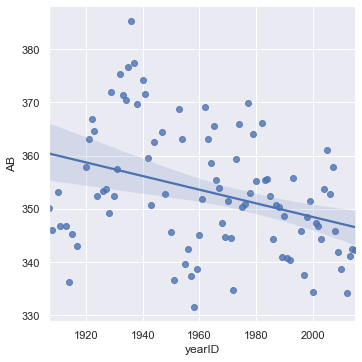

In [197]:
#Plot the league average of At-Bats for every season
sns.lmplot(x='yearID', y='AB',data=battingcompletebyYear, fit_reg=True)

# Finding #3: Analysis of Pitcher Usage Over the Years

In [37]:
# Import and clean the pitching dataset
pitching = pd.read_csv('Pitching.csv', index_col=0)
pitching = pitching.drop(['lgID','IBB','WP','HBP','BK','BFP','GF','SH','SF','GIDP','BAOpp'], axis=1)
pitching.head()

,yearID,stint,teamID,W,L,G,GS,CG,SHO,SV,IPouts,H,ER,HR,BB,SO,ERA,R
playerID,,,,,,,,,,,,,,,,,,
bechtge01,1871,1,PH1,1,2,3,3,2,0,0,78.0,43,23,0,11,1,7.96,42
brainas01,1871,1,WS3,12,15,30,30,30,0,0,792.0,361,132,4,37,13,4.50,292
fergubo01,1871,1,NY2,0,0,1,0,0,0,0,3.0,8,3,0,0,0,27.00,9
fishech01,1871,1,RC1,4,16,24,24,22,1,0,639.0,295,103,3,31,15,4.35,257
fleetfr01,1871,1,NY2,0,1,1,1,1,0,0,27.0,20,10,0,3,0,10.00,21


In [139]:
#Merge the pitching dataset with the player name dataset
pitchingcomplete = pd.merge(pitching, playernames, on=['playerID'], how='left')
pitchingcomplete.rename(columns={'IPouts': 'IP'}, inplace=True)
pitchingcomplete

,yearID,stint,teamID,W,L,G,GS,CG,SHO,SV,...,H,ER,HR,BB,SO,ERA,R,count,nameFirst,nameLast
playerID,,,,,,,,,,,,,,,,,,,,,
bechtge01,1871,1,PH1,1,2,3,3,2,0,0,...,43,23,0,11,1,7.96,42,1,George,Bechtel
brainas01,1871,1,WS3,12,15,30,30,30,0,0,...,361,132,4,37,13,4.50,292,1,Asa,Brainard
fergubo01,1871,1,NY2,0,0,1,0,0,0,0,...,8,3,0,0,0,27.00,9,1,Bob,Ferguson
fishech01,1871,1,RC1,4,16,24,24,22,1,0,...,295,103,3,31,15,4.35,257,1,Cherokee,Fisher
fleetfr01,1871,1,NY2,0,1,1,1,1,0,0,...,20,10,0,3,0,10.00,21,1,Frank,Fleet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
youngch03,2015,1,KCA,11,6,34,18,0,0,0,...,91,42,16,43,83,3.06,44,1,Chris,Young
zieglbr01,2015,1,ARI,0,3,66,0,0,0,30,...,48,14,3,17,36,1.85,17,1,Brad,Ziegler
zimmejo02,2015,1,WAS,13,10,33,33,0,0,0,...,204,82,24,39,164,3.66,89,1,Jordan,Zimmermann


In [140]:
#Calculate the league averages of each stat for every season
pitchingcompletebyYear = pitchingcomplete.groupby(by='yearID').mean()
pitchingcompletebyYear = pitchingcompletebyYear.reset_index()
pitchingcompletebyYear

,yearID,stint,W,L,G,GS,CG,SHO,SV,IP,H,ER,HR,BB,SO,ERA,R,count
0,1871,1.000000,6.315789,6.315789,14.578947,13.368421,12.157895,0.210526,0.210526,355.263158,163.210526,55.526316,2.473684,20.684211,9.210526,5.991579,139.947368,1.0
1,1872,1.130435,7.739130,7.739130,17.521739,15.913043,14.304348,0.434783,0.086957,428.521739,194.739130,59.000000,1.521739,10.695652,10.956522,4.798696,147.347826,1.0
2,1873,1.000000,7.880000,7.880000,17.280000,15.920000,14.560000,0.320000,0.160000,430.160000,196.920000,51.800000,2.040000,12.840000,9.600000,4.315600,143.200000,1.0
3,1874,1.000000,13.588235,13.588235,28.764706,27.294118,25.882353,0.882353,0.235294,736.352941,308.176471,82.294118,2.470588,14.000000,11.294118,4.899412,204.117647,1.0
4,1875,1.127660,7.127660,7.127660,16.234043,14.680851,13.212766,1.021277,0.382979,395.255319,144.574468,36.000000,0.893617,5.553191,8.234043,4.239149,90.085106,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,2011,1.066478,3.435644,3.435644,26.520509,6.871287,0.244696,0.106082,1.758133,184.698727,59.783593,26.968883,6.438472,21.241867,48.780764,4.713847,29.431400,1.0
141,2012,1.084488,3.365651,3.365651,26.844875,6.731302,0.177285,0.095568,1.746537,180.146814,58.259003,26.786704,6.833795,20.372576,50.451524,5.274563,29.109418,1.0
142,2013,1.073003,3.348485,3.348485,26.440771,6.696970,0.170799,0.078512,1.743802,180.385675,57.979339,25.826446,6.420110,20.165289,50.564738,4.920207,27.899449,1.0
143,2014,1.077748,3.257373,3.257373,25.899464,6.514745,0.158177,0.087131,1.694370,175.625503,55.757373,24.301609,5.611260,18.793566,50.189008,5.101319,26.489276,1.0


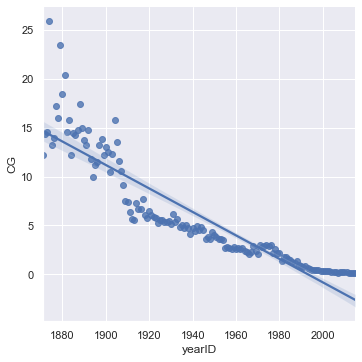

In [181]:
#Graph #1: Plot the league average of Complete Games for every season
sns.lmplot(x='yearID', y='CG',data=pitchingcompletebyYear, fit_reg=True)

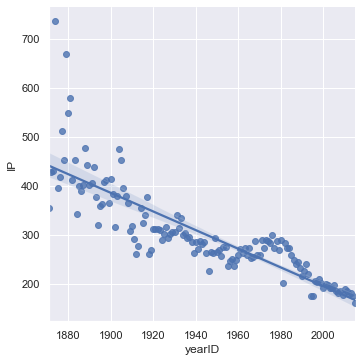

In [180]:
#Graph #2 Plot the league average of Innings pitched for every season
sns.lmplot(x='yearID', y='IP',data=pitchingcompletebyYear, fit_reg=True)

In [183]:
# Create a dataset of the Count of Pitchers Who Played at Least One Game for each season
pitching['count'] = 1
PitchersPerYear = pitching.groupby(by='yearID').agg({'count': sum})
PitchersPerYear = PitchersPerYear.reset_index()
PitchersPerYear.to_csv('Pitchers Per Year.csv')
PitchersPerYear.rename(columns={'yearID':'Year','count':'Count of Pitchers Who Played at Least One Game'},inplace=True)
#pitchingcomplete.rename(columns={'IPouts': 'IP'}, inplace=True)
PitchersPerYear.head()

,Year,Count of Pitchers Who Played at Least One Game
0,1871,19
1,1872,23
2,1873,25
3,1874,17
4,1875,47


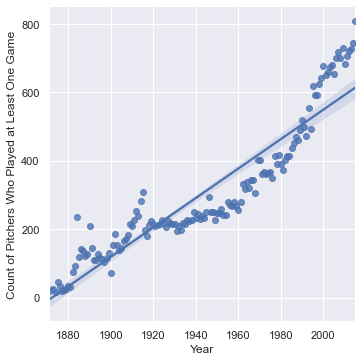

In [184]:
#Graph #3: Plot the Count of Pitchers Who Played at Least One Game for each season
sns.lmplot(x='Year', y='Count of Pitchers Who Played at Least One Game',data=PitchersPerYear, fit_reg=True)

In [230]:
#Create a new dataframe containing the length of each MLB player's career, measured in years
PitchersCareerLengths = pitchingcomplete.groupby(by='playerID').count()
PitchersCareerLengths['Career Length'] = PitchersCareerLengths['stint']
PitchersCareerLengths = PitchersCareerLengths.drop(['stint','yearID','teamID','W','L','G','GS','CG','SHO','SV','H','ER','HR','BB','SO','ERA','R','IP','nameFirst','nameLast','count'],axis=1)
PitchersCareerLengths.head()

,Career Length
playerID,
aardsda01,9
aasedo01,13
abadfe01,6
abbeybe01,6
abbeych01,1


In [185]:
#Create a dataset containing the year each MLB player debuted, or played in their first game 
def minimum_year(x):
    return min(x['yearID'])

careerstart = pitchingcomplete.groupby('playerID').apply(lambda x: minimum_year(x) )
careerstart = pd.DataFrame(careerstart)
careerstart.rename(columns={0: 'Year of Debut'}, inplace=True)
careerstart.head()

,Year of Debut
playerID,
aardsda01,2004
aasedo01,1977
abadfe01,2010
abbeybe01,1892
abbeych01,1896


In [232]:
#Merge the Career Length and Debut datasets 
careerpitching = pd.merge(careerstart, pitchingcount, on=['playerID'])
careerpitching.head()

,Year of Debut,Career Length
playerID,,
aardsda01,2004,9
aasedo01,1977,13
abadfe01,2010,6
abbeybe01,1892,6
abbeych01,1896,1


In [235]:
#Create a new dataframe containing the average length of each MLB player's career, measured in years
#If a pitcher debuted in 1871, then his career length will be used to calculate the average career length in 1871 along with all the other pitchers who debuted that year 
YearlyCareerLengthAverages = careerpitching.groupby(by='Year of Debut').mean()
YearlyCareerLengthAverages.head()

,Career Length
Year of Debut,
1871,4.736842
1872,2.000000
1873,1.111111
1874,4.200000
1875,3.000000


In [236]:
#Clean Up the Yearly Career Length Averages dataset
#We will be dropping the last 10 years, since it is impossible for those players to have a career longer than 10 years
YearlyCareerLengthAverages = YearlyCareerLengthAverages.reset_index()
YearlyCareerLengthAverages.rename(columns={'Year of Debut': 'Year', 'Career Length': 'Average Career Length of Pitchers Debuting That Year, Measured in Years'}, inplace=True)
YearlyCareerLengthAverages = YearlyCareerLengthAverages.iloc[:-10,:]
YearlyCareerLengthAverages.to_csv('YearlyCareerLengthAverages.csv')
YearlyCareerLengthAverages.head()

,Year,"Average Career Length of Pitchers Debuting That Year, Measured in Years"
0,1871,4.736842
1,1872,2.000000
2,1873,1.111111
3,1874,4.200000
4,1875,3.000000


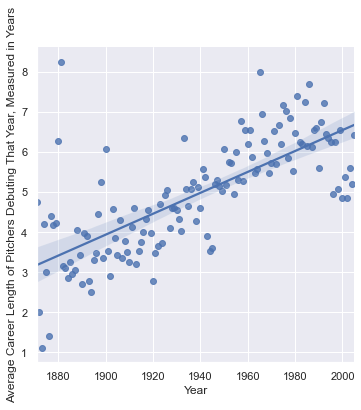

In [194]:
#Plot the average Career Length, measured in Years, of Pitchers in each debut year
sns.lmplot(x='Year', y='Average Career Length of Pitchers Debuting That Year, Measured in Years',data=YearlyCareerLengthAverages, fit_reg=True)

In [ ]:
# Implications for finding #1:
# A player's statistics are a big, and even biggest indicator of performance
# When considering players to offer a contract, their statistics should be the first thing that management considers
# This machine learning algorithm can predict whether a player is an all star or not with 71% accuracy based off statistics
# In addition, algorithms like these can be used to predict mid-season if a player is going to be an all star
# This can be valuable for sports analysts looking to project all star rosters 

In [ ]:
# Implications for finding #2:
# as we can see, the league average for homeruns has risen over the years despite the average at bats going down
# this can most likely be attributed to advancements in sports training 
# with more knowlegde about biomechanics and exercise equiment becoming more advanced, players have more and more ways to improve
# For example, recently, devices called Rapsodo devices have been invented (2011) to measure the plane of a batter's swing and are widely used by MLB teams
# With more knowledge on one's performance, players can make the necessary adjustments to hit the ball more square and thus further
# A clear upward trend in player performance can give us insight that money should continue to be invested in advanced training equipment and analytics

In [ ]:
# Implications for finding #3:
#As we can see from the four graphs, average complete game pitched and average innings pitched are on a downward trend, while career longevity is on an upward trend
#It makes sense that the less teams overuse and strain pitchers' health, the longer their career can be
#Managers should always be mindful of the physical health of their pitchers, as overuse can lead to injuries and early career endings and less return on investment